In [1]:
import seaborn as sns
import cmdstanpy as stan
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pickle

/Users/leevi/.pyenv/versions/3.10.0/envs/bda-venv/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [25]:
logreg_og = stan.from_csv('inference_adapt_delta/logreg/*[1-4].csv')
hier_og = stan.from_csv('inference_adapt_delta/hier/*[1-4].csv')
logreg_offset = stan.from_csv('inference_offset_prior_adapt_delta/logreg/*[1-4].csv')
hier_offset = stan.from_csv('inference_offset_prior_adapt_delta/hier/*[1-4].csv')

In [32]:
hier_og.diagnose()

INFO:cmdstanpy:Processing csv files: inference_adapt_delta/hier/hier-202112062002-4.csv, inference_adapt_delta/hier/hier-202112062002-3.csv, inference_adapt_delta/hier/hier-202112062002-2.csv, inference_adapt_delta/hier/hier-202112062002-1.csv

Checking sampler transitions treedepth.
3940 of 16000 (25%) transitions hit the maximum treedepth limit of 12, or 2^12 leapfrog steps.
Trajectories that are prematurely terminated due to this limit will result in slow exploration.
For optimal performance, increase this limit.

Checking sampler transitions for divergences.
371 of 16000 (2.3%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all pa

"Processing csv files: inference_adapt_delta/hier/hier-202112062002-4.csv, inference_adapt_delta/hier/hier-202112062002-3.csv, inference_adapt_delta/hier/hier-202112062002-2.csv, inference_adapt_delta/hier/hier-202112062002-1.csv\n\nChecking sampler transitions treedepth.\n3940 of 16000 (25%) transitions hit the maximum treedepth limit of 12, or 2^12 leapfrog steps.\nTrajectories that are prematurely terminated due to this limit will result in slow exploration.\nFor optimal performance, increase this limit.\n\nChecking sampler transitions for divergences.\n371 of 16000 (2.3%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory al

In [3]:
colors = sns.color_palette()
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

# Prior viz

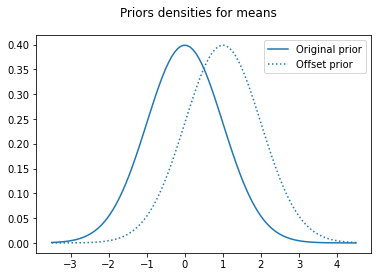

In [4]:
x = np.linspace(-3.5, 4.5, 100)
y_og = stats.norm(0, 1).pdf(x)
y_offset = stats.norm(1, 1).pdf(x)
plt.plot(x, y_og, color=colors[0], label='Original prior')
plt.plot(x, y_offset, color=colors[0], linestyle='dotted', label='Offset prior')
plt.suptitle('Priors densities for means')
plt.legend()
plt.savefig('plots/sensitivity_prior.pdf')

# Beta posteriors logreg

In [26]:
with open('inference/logreg/data.pkl', 'rb') as f:
    logreg_data = pickle.load(f)
with open('inference/hier/data.pkl', 'rb') as f:
    hier_data = pickle.load(f)


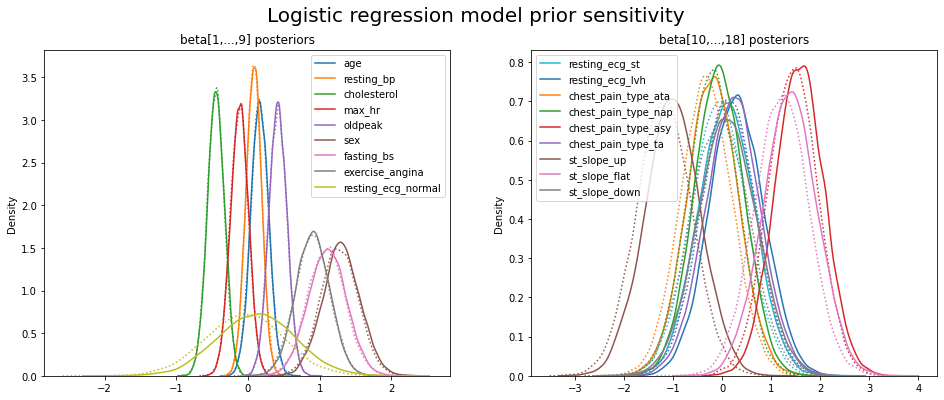

In [27]:

col_names = logreg_data['X'].columns
betas_og = logreg_og.stan_variable('beta')
betas_offset = logreg_offset.stan_variable('beta')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for i in range(9):
    sns.kdeplot(betas_og[:, i], color=colors[i%10], label=col_names[i], ax=ax1)
    sns.kdeplot(betas_offset[:, i], color=colors[i%10], linestyle='dotted', ax=ax1)

ax1.legend()
ax1.set_title('beta[1,...,9] posteriors')
#plt.show()

#fig, ax = plt.subplots(figsize=(8, 6))
for i in range(9, 18):
    sns.kdeplot(betas_og[:, i], color=colors[i%10], label=col_names[i], ax=ax2)
    sns.kdeplot(betas_offset[:, i], color=colors[i%10], linestyle='dotted', ax=ax2)

ax2.legend()
ax2.set_title('beta[10,...,18] posteriors')
fig.suptitle('Logistic regression model prior sensitivity', size=20)
#plt.savefig('plots/sensitivity_logreg.pdf')

plt.show()

# Beta posterior hier

Summattuna hierarkian yli, siksi näyttää noin hupsuilta

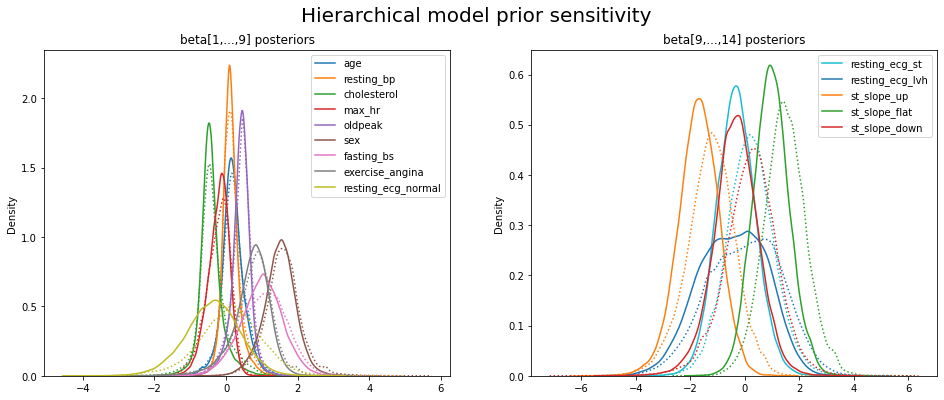

In [28]:
betas_og = hier_og.stan_variable('beta')
betas_offset = hier_offset.stan_variable('beta')

col_names = hier_data['X'].columns
colors = sns.color_palette()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i in range(9):
    sns.kdeplot(betas_og[:, :, i].reshape(-1), color=colors[i%10], label=col_names[i], ax=ax1)
    sns.kdeplot(betas_offset[:, :, i].reshape(-1), color=colors[i%10], linestyle='dotted', ax=ax1)

ax1.set_title('beta[1,...,9] posteriors')
ax1.legend()


colors = sns.color_palette()
for i in range(9, 14):
    sns.kdeplot(betas_og[:, :, i].reshape(-1), color=colors[i%10], label=col_names[i], ax=ax2)
    sns.kdeplot(betas_offset[:, :, i].reshape(-1), color=colors[i%10], linestyle='dotted', ax=ax2)
ax2.legend()
ax2.set_title('beta[9,...,14] posteriors')
fig.suptitle('Hierarchical model prior sensitivity', size=20)
fig.savefig('plots/sensitivity_hier.pdf')
plt.show()

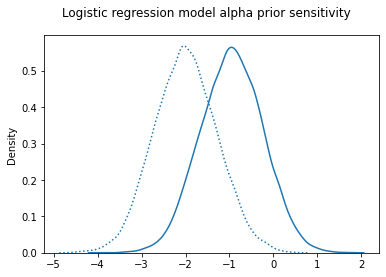

In [23]:
fig, ax = plt.subplots()
sns.kdeplot(logreg_offset.stan_variable('alpha'), ax=ax, linestyle='dotted', color=colors[0])
sns.kdeplot(logreg_og.stan_variable('alpha'), ax=ax, linestyle='solid', color=colors[0])
fig.suptitle('Logistic regression model alpha prior sensitivity')
plt.savefig('plots/sens_logreg_alpha.pdf')

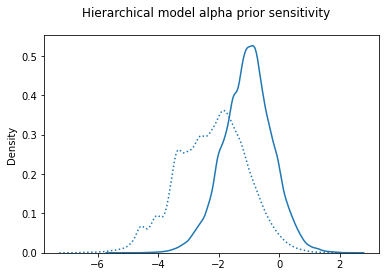

In [24]:
fig, ax = plt.subplots()
sns.kdeplot(hier_offset.stan_variable('alpha').reshape(-1), ax=ax, linestyle='dotted', color=colors[0])
sns.kdeplot(hier_og.stan_variable('alpha').reshape(-1), ax=ax, linestyle='solid', color=colors[0])
fig.suptitle('Hierarchical model alpha prior sensitivity')
plt.savefig('plots/sens_hier_alpha.pdf')

In [16]:
hier_offset.stan_variable('alpha').reshape(-1).mean()

-2.224511655347175

In [17]:
hier_og.stan_variable('alpha').reshape(-1).mean()

-1.0410057230436045

In [21]:
og = hier_og.stan_variables()
for key, value in og.items():
    print(key, value.shape)

alpha_mu (16000,)
alpha_sigma (16000,)
beta_mu (16000, 14)
beta_sigma (16000, 14)
alpha (16000, 4)
beta (16000, 4, 14)
theta (16000, 918)
log_lik (16000, 918)
